In [1]:
import pandas as pd

In [2]:
df= pd.read_csv ("umsatzdaten_gekuerzt.csv")
df.head()

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


In [3]:
#Datum umwandeln
df['Datum'] = pd.to_datetime(df['Datum'])

#Wochentag bestimmen
df['Wochentag'] = df['Datum'].dt.day_name()

In [5]:
#average sales per weekday
avg_per_weekday = df.groupby('Wochentag')['Umsatz'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_per_weekday = avg_per_weekday.reindex(weekday_order)
print(avg_per_weekday)

Wochentag
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64


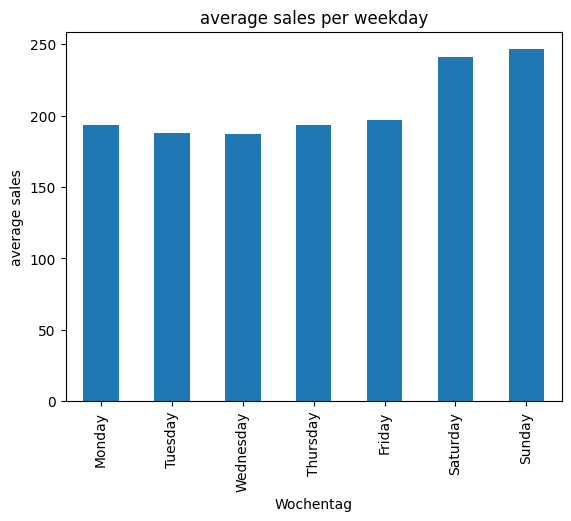

In [6]:
#Balkendiagramm erstellen (bar chart)
import matplotlib.pyplot as plt
avg_per_weekday.plot(kind='bar')
plt.xlabel('Wochentag')
plt.ylabel('average sales')
plt.title('average sales per weekday')
plt.show()

In [10]:
#confidence intervals berechnen

sem_sales =df.groupby('Wochentag')['Umsatz'].sem().reindex (weekday_order) #standard error mean (sem)
print(sem_sales)

Wochentag
Monday       3.503428
Tuesday      3.450620
Wednesday    3.524152
Thursday     3.603339
Friday       3.520063
Saturday     4.568145
Sunday       4.873623
Name: Umsatz, dtype: float64


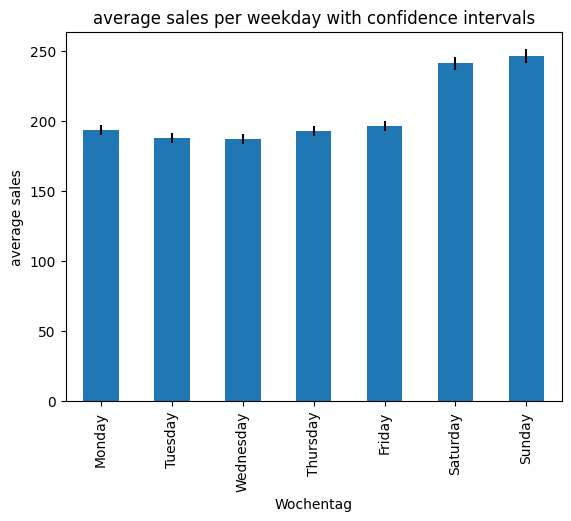

In [ ]:
#confidence intervals zum Balkendiagramm hinzufuegen
avg_per_weekday.plot(kind='bar', yerr=sem_sales) #yerr = Standardfehler
plt.xlabel('Wochentag')
plt.ylabel('average sales')
plt.title('average sales per weekday with confidence intervals')
plt.show()